In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

keras=tf.keras

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata= tfds.load('cats_vs_dogs', split=['train[:80%]','train[80%:90%]', 'train[90%:]'], with_info=True, as_supervised=True)

In [ ]:

get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(550):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))



In [ ]:
pip install matplotlib==3.1.3

In [ ]:
IMG_SIZE=160

def format_example(image,label):
    image=tf.cast(image, tf.float32)
    image = (image/127.5)- 1
    image = tf.image.resize(image,(IMG_SIZE, IMG_SIZE))
    return image, label


train= raw_train.map(format_example)
validation= raw_validation.map(format_example)
test= raw_test.map(format_example)


In [ ]:
# for image, label in train.take(15):
#     plt.figure()
#     plt.imshow(image)
#     plt.title(get_label_name(label))


In [ ]:

BATCH_SIZE=32
SHUFFLE_BUFFER_SIZE=1000
train_batches= train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches= validation.batch(BATCH_SIZE)
test_batches= test.batch(BATCH_SIZE)



In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


In [ ]:
# base_model.summary()


In [ ]:
base_model.trainable = False

In [ ]:
# base_model.summary()

In [ ]:
global_avg_layer= tf.keras.layers.GlobalAveragePooling2D()
pred_layer=keras.layers.Dense(1)

In [ ]:
model = tf.keras.Sequential([base_model, global_avg_layer, pred_layer])


In [ ]:
# model.summary()


In [ ]:
model.save("dogs_vs_cats.h5")


In [ ]:
predictions= model.predict(test_batches)


<ipython-input-36-c7fec8883150>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


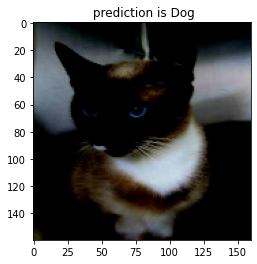

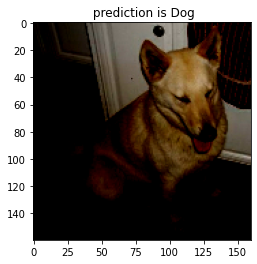

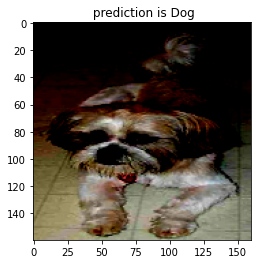

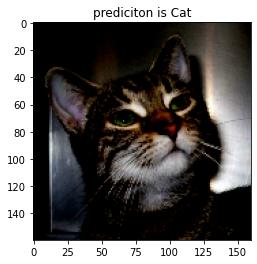

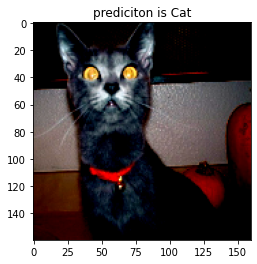

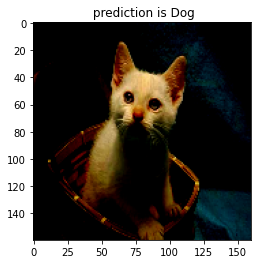

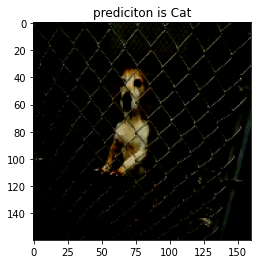

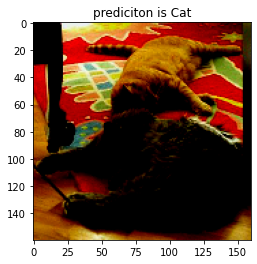

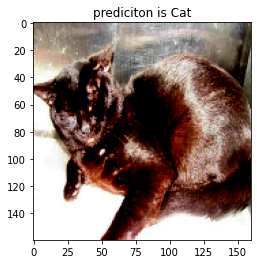

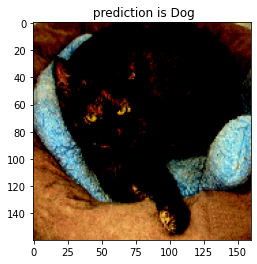

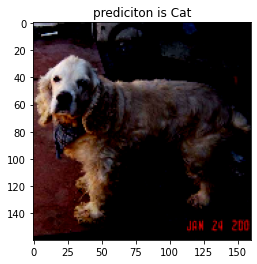

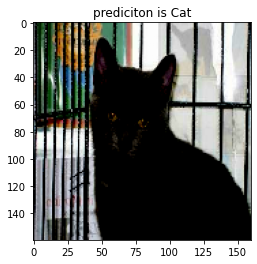

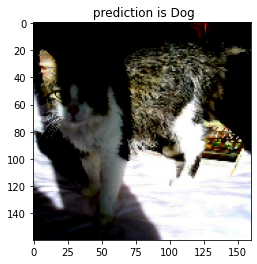

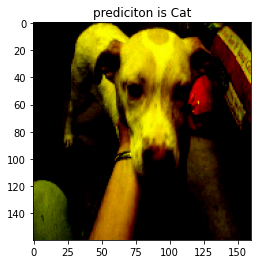

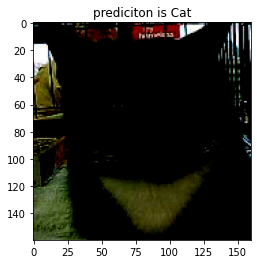

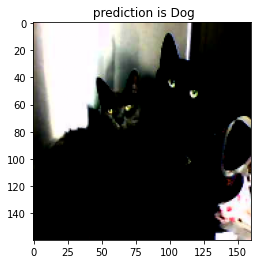

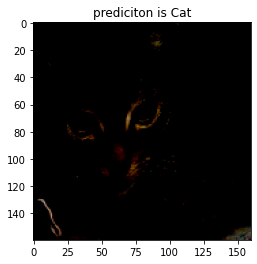

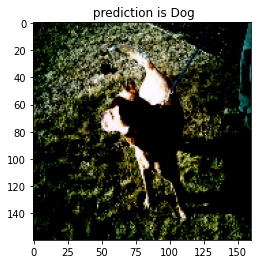

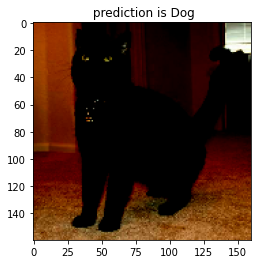

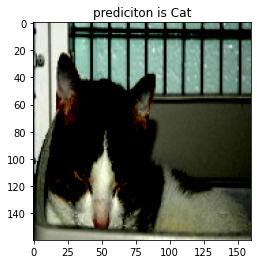

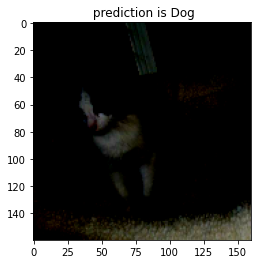

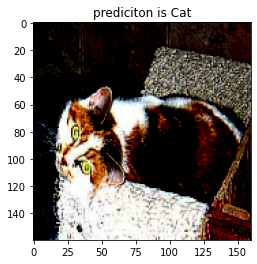

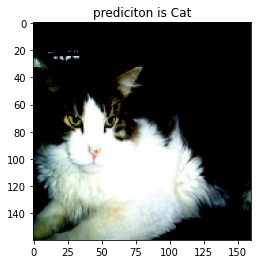

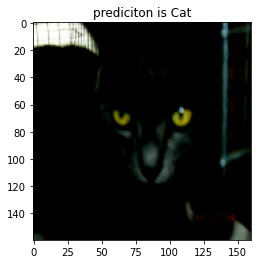

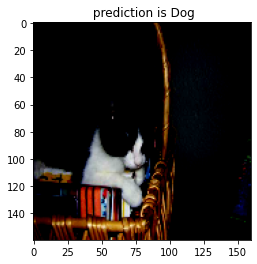

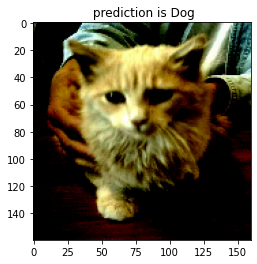

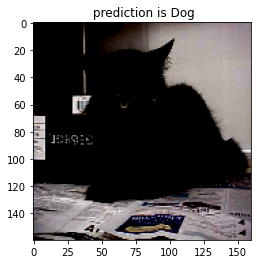

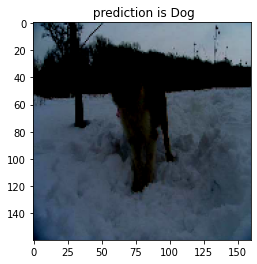

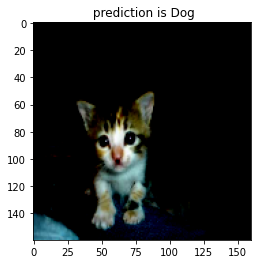

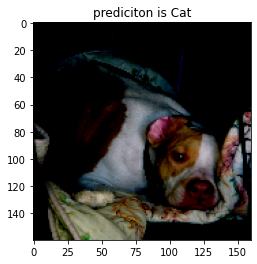

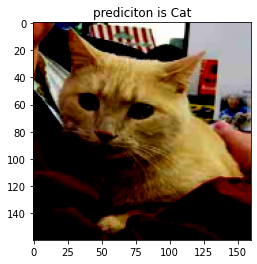

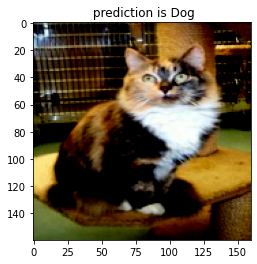

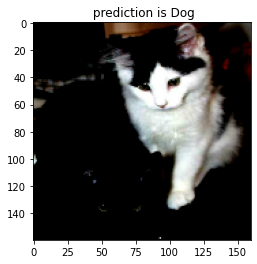

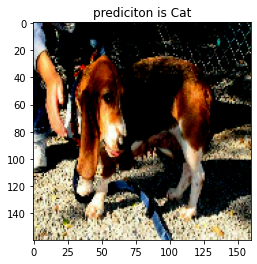

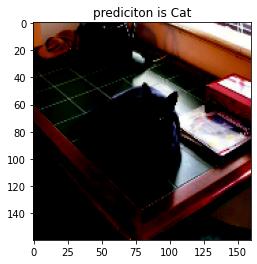

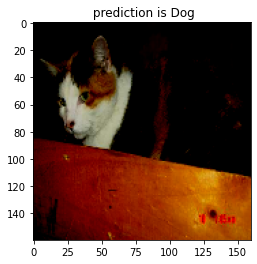

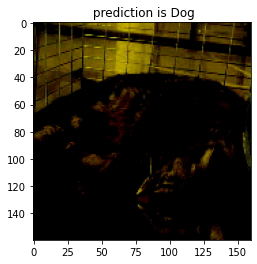

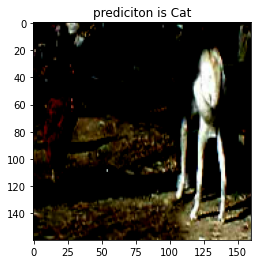

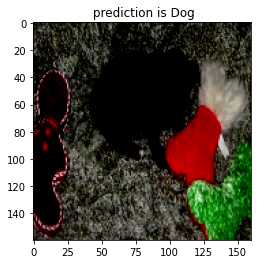

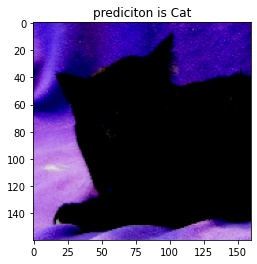

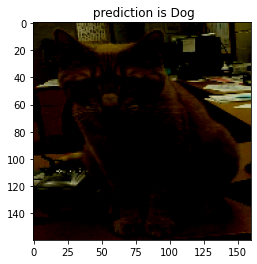

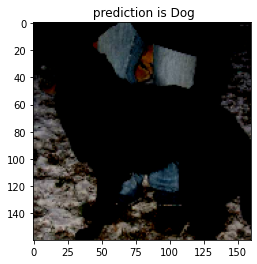

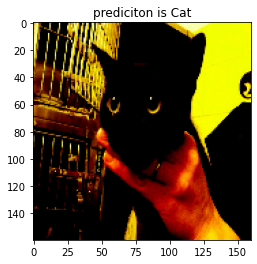

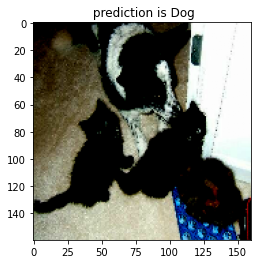

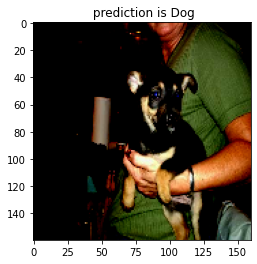

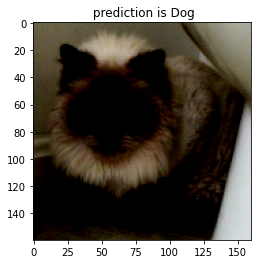

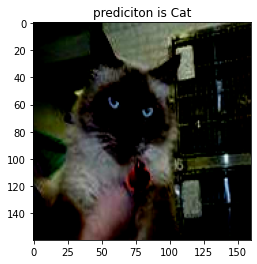

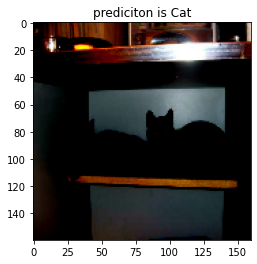

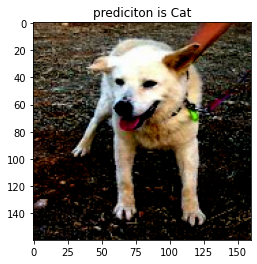

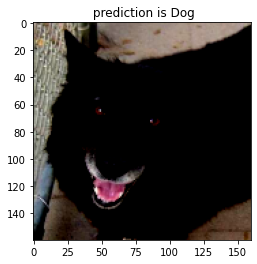

In [ ]:
i=0
for image, label in test.take(50):
    plt.figure()
    plt.imshow(image)
    if predictions[i]>0:
        plt.title(" prediction is Dog")
    elif predictions[i]<0:
        plt.title("prediciton is Cat")


    i+=1

